# Movie Market Analysis

## Define Objectives

### Business Problem

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

### Project Overview

The primary objective of this project is to explore and analyze trends in the movie industry to provide actionable insights for a new movie studio. This analysis aims to inform the studio's decision-making process regarding the types of films to produce, based on current market trends and box office performance.

### Key Business Questions

To guide the analysis, we will focus on the following key business questions:

1. **What types of films are currently performing well at the box office?**
   - Analyze the box office performance of different genres to identify which types of films generate the highest revenue.
   
2. **Which factors are associated with higher box office revenue?**
   - Investigate various factors such as budget, release date, and runtime to determine their impact on box office success.
   
3. **What actionable strategies can be derived from the analysis to guide the studio’s film production decisions?**
   - Provide concrete recommendations based on the data analysis to help the studio decide on the types of films to produce.

### Data Sources

To answer these questions, we will utilize datasets from the following sources:
- **Box Office Mojo**: Data on box office gross.
- **IMDB**: Movie metadata, including genres, ratings, and more (stored in a SQLite database).
- **Rotten Tomatoes**: Movie reviews and ratings.
- **TheMovieDB**: Additional movie details and metadata.
- **The Numbers**: Box office revenue data.

### Expected Deliverables

The expected deliverables for this project are:
1. **Non-Technical Presentation**: A slide deck presenting the analysis and findings to business stakeholders.
2. **Jupyter Notebook**: A well-documented notebook that presents the analysis in a clear and organized manner, suitable for a data science audience.
3. **GitHub Repository**: A repository containing all project files, including the notebook, presentation, and a detailed README file.

By addressing these objectives and utilizing the provided datasets, we aim to deliver insights that will guide the new movie studio in making informed production decisions.

## Data Acquisition

### Overview

In this section, we will acquire and load the datasets needed for our analysis. The data comes from multiple sources, including Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers. We will first download and unzip the datasets, then load them into our Jupyter Notebook for further analysis.

### Datasets

The primary datasets we will use are:
1. **Box Office Mojo**: Contains data on box office gross.
   - File: `data/bom.movie_gross.csv`
   
2. **IMDB**: Contains movie metadata including genres, ratings, and more.
   - File: `data/im.db`
   - Relevant tables: `movie_basics`, `movie_ratings`
   
3. **Rotten Tomatoes**: Contains movie reviews and additional metadata.
   - Files: 
     - `data/rt.movie_info.tsv` (Movie Info)
     - `data/rt.reviews.tsv` (Reviews)
   
4. **TheMovieDB**: Contains movie metadata including genres, release dates, and ratings.
   - File: `data/tmdb.movies.csv`
   
5. **The Numbers**: Contains data on production budgets and box office gross.
   - File: `data/tn.movie_budgets.csv`

### Data Loading

We will use Python libraries such as `pandas` and `sqlite3` to load the datasets into dataframes for analysis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import os
import zipfile
import numpy as np
%matplotlib inline

In [3]:
bom_df = pd.read_csv('../ZippedData/bom.movie_gross.csv.gz')
rtmi_df = pd.read_csv('../ZippedData/rt.movie_info.tsv.gz', delimiter='\t', index_col=0)
rtr_df = pd.read_csv('../ZippedData/rt.reviews.tsv.gz', delimiter='\t', index_col=0, encoding='ISO-8859-1')
tmdb_df = pd.read_csv('../ZippedData/tmdb.movies.csv.gz', index_col=0)
tnmb_df = pd.read_csv('../ZippedData/tn.movie_budgets.csv.gz')

In [4]:
# Unzip IMDB SQLite database
with zipfile.ZipFile('../ZippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('../ZippedData')
print("IMDB database unzipped successfully.")

conn = sqlite3.connect('../ZippedData/im.db')
pd.read_sql(
"""
SELECT name 
FROM sqlite_master 
WHERE type='table';
""", conn
)

IMDB database unzipped successfully.


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


### Data Overview

#### Box Office Mojo Data

In [5]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


#### IMDB Data

In [6]:
imdb_df = pd.read_sql(
"""
SELECT * 
FROM movie_basics
JOIN movie_ratings
USING (movie_id)
""", conn
)
imdb_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


#### Rotten Tomatoes

##### Rotten Tomatoes: Movie_Info

In [7]:
rtmi_df.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


##### Rotten Tomatoes: Reviews

In [8]:
rtr_df.head()

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


#### TheMovieDB

In [9]:
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


#### The Numbers

In [10]:
tnmb_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Q1: Which genres are most profitable?

### Introduction

In this section, we will analyze the profitability of different movie genres. This involves examining the box office gross (both domestic and foreign), production budgets, and other relevant financial metrics. Our goal is to determine which genres consistently yield the highest returns on investment.

**Columns of Interest**
- genres (IMDB)
- domestic_gross (Box Office Mojo, The Numbers)
- foreign_gross (Box Office Mojo)
- worldwide_gross (The Numbers)

In [11]:
def get_percentage_missing(dataframe):
    missing_values_series = dataframe.isna().sum()
    missing_values_indexes = list(missing_values_series.index)
    missing_values_values = list(missing_values_series.values)
    missing_values_percentage = pd.DataFrame({"indexes": missing_values_indexes, "values": missing_values_values, "percentage_missing": list(np.round(((np.array(missing_values_values) * 100) / len(dataframe)), 2))})
    missing_values_percentage.set_index("indexes", inplace=True)
    return missing_values_percentage

In [12]:
get_percentage_missing(bom_df)

,values,percentage_missing
indexes,,
title,0,0.00
studio,5,0.15
domestic_gross,28,0.83
foreign_gross,1350,39.86
year,0,0.00


### Data Preparation

#### Fix currency and type

In [13]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [14]:
# The domestic_gross should be rounded off to the nearest 10000 for concistency
def fix_dollar(money):
    if isinstance(money, str):
        money = float(money.replace('$', '').replace(',', ''))
    return float(round(money / 100000) * 100000)

In [15]:
tnmb_df['domestic_gross'] = tnmb_df['domestic_gross'].map(fix_dollar)
tnmb_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760500000.0,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241100000.0,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",42800000.0,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",459000000.0,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620200000.0,"$1,316,721,747"


In [16]:
merged_df = pd.merge(bom_df, tnmb_df, how='inner', left_on='title', right_on='movie')
merged_df = pd.merge(merged_df, imdb_df, how='inner', left_on='title', right_on='primary_title')
merged_df = merged_df[['title', 'genres', 'domestic_gross_x', 'domestic_gross_y', 'foreign_gross', 'production_budget', 'worldwide_gross']]
merged_df

,title,genres,domestic_gross_x,domestic_gross_y,foreign_gross,production_budget,worldwide_gross
0,Toy Story 3,"Adventure,Animation,Comedy",415000000.0,415000000.0,652000000,"$200,000,000","$1,068,879,522"
1,Inception,"Action,Adventure,Sci-Fi",292600000.0,292600000.0,535700000,"$160,000,000","$835,524,642"
2,Shrek Forever After,"Adventure,Animation,Comedy",238700000.0,238700000.0,513900000,"$165,000,000","$756,244,673"
3,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",300500000.0,300500000.0,398000000,"$68,000,000","$706,102,828"
4,Iron Man 2,"Action,Adventure,Sci-Fi",312400000.0,312400000.0,311500000,"$170,000,000","$621,156,389"
...,...,...,...,...,...,...,...
1408,Gotti,"Biography,Crime,Drama",4300000.0,4300000.0,NaN,"$10,000,000","$6,089,100"
1409,Bilal: A New Breed of Hero,"Action,Adventure,Animation",491000.0,500000.0,1700000,"$30,000,000","$648,599"
1410,Mandy,"Drama,Thriller",1200000.0,1200000.0,NaN,"$6,000,000","$1,427,656"
1411,Mandy,"Action,Fantasy,Horror",1200000.0,1200000.0,NaN,"$6,000,000","$1,427,656"


In [17]:
cleaned_df = merged_df[merged_df['domestic_gross_x'] == merged_df['domestic_gross_y']].copy()
cleaned_df.loc[:, 'domestic_gross'] = cleaned_df['domestic_gross_x']
cleaned_df.drop(columns=['domestic_gross_x', 'domestic_gross_y'], inplace=True)
cleaned_df

,title,genres,foreign_gross,production_budget,worldwide_gross,domestic_gross
0,Toy Story 3,"Adventure,Animation,Comedy",652000000,"$200,000,000","$1,068,879,522",415000000.0
1,Inception,"Action,Adventure,Sci-Fi",535700000,"$160,000,000","$835,524,642",292600000.0
2,Shrek Forever After,"Adventure,Animation,Comedy",513900000,"$165,000,000","$756,244,673",238700000.0
3,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",398000000,"$68,000,000","$706,102,828",300500000.0
4,Iron Man 2,"Action,Adventure,Sci-Fi",311500000,"$170,000,000","$621,156,389",312400000.0
...,...,...,...,...,...,...
1407,Destroyer,"Action,Crime,Drama",4000000,"$9,000,000","$3,681,096",1500000.0
1408,Gotti,"Biography,Crime,Drama",NaN,"$10,000,000","$6,089,100",4300000.0
1410,Mandy,"Drama,Thriller",NaN,"$6,000,000","$1,427,656",1200000.0
1411,Mandy,"Action,Fantasy,Horror",NaN,"$6,000,000","$1,427,656",1200000.0


#### Handle Missing Values

In [18]:
get_percentage_missing(cleaned_df)

,values,percentage_missing
indexes,,
title,0,0.00
genres,4,0.35
foreign_gross,109,9.59
production_budget,0,0.00
worldwide_gross,0,0.00
domestic_gross,0,0.00


In [19]:
cleaned_df['genres'] = cleaned_df['genres'].fillna('Unknown')
cleaned_df['foreign_gross'] = pd.to_numeric(cleaned_df['foreign_gross'], errors='coerce')
median_foreign_gross = cleaned_df['foreign_gross'].median()
cleaned_df['foreign_gross'] = cleaned_df['foreign_gross'].fillna(median_foreign_gross)

In [20]:
get_percentage_missing(cleaned_df)

,values,percentage_missing
indexes,,
title,0,0.0
genres,0,0.0
foreign_gross,0,0.0
production_budget,0,0.0
worldwide_gross,0,0.0
domestic_gross,0,0.0


In [21]:
cleaned_df

,title,genres,foreign_gross,production_budget,worldwide_gross,domestic_gross
0,Toy Story 3,"Adventure,Animation,Comedy",652000000.0,"$200,000,000","$1,068,879,522",415000000.0
1,Inception,"Action,Adventure,Sci-Fi",535700000.0,"$160,000,000","$835,524,642",292600000.0
2,Shrek Forever After,"Adventure,Animation,Comedy",513900000.0,"$165,000,000","$756,244,673",238700000.0
3,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",398000000.0,"$68,000,000","$706,102,828",300500000.0
4,Iron Man 2,"Action,Adventure,Sci-Fi",311500000.0,"$170,000,000","$621,156,389",312400000.0
...,...,...,...,...,...,...
1407,Destroyer,"Action,Crime,Drama",4000000.0,"$9,000,000","$3,681,096",1500000.0
1408,Gotti,"Biography,Crime,Drama",44700000.0,"$10,000,000","$6,089,100",4300000.0
1410,Mandy,"Drama,Thriller",44700000.0,"$6,000,000","$1,427,656",1200000.0
1411,Mandy,"Action,Fantasy,Horror",44700000.0,"$6,000,000","$1,427,656",1200000.0


In [22]:
def clean_currency(column):
    if isinstance(column, str):
        column = float(column.replace('$', '').replace(',', ''))
    return float(column)

In [23]:
cleaned_df['worldwide_gross'] = cleaned_df['worldwide_gross'].map(clean_currency)
cleaned_df['production_budget'] = cleaned_df['production_budget'].map(clean_currency)
cleaned_df

,title,genres,foreign_gross,production_budget,worldwide_gross,domestic_gross
0,Toy Story 3,"Adventure,Animation,Comedy",652000000.0,200000000.0,1.068880e+09,415000000.0
1,Inception,"Action,Adventure,Sci-Fi",535700000.0,160000000.0,8.355246e+08,292600000.0
2,Shrek Forever After,"Adventure,Animation,Comedy",513900000.0,165000000.0,7.562447e+08,238700000.0
3,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",398000000.0,68000000.0,7.061028e+08,300500000.0
4,Iron Man 2,"Action,Adventure,Sci-Fi",311500000.0,170000000.0,6.211564e+08,312400000.0
...,...,...,...,...,...,...
1407,Destroyer,"Action,Crime,Drama",4000000.0,9000000.0,3.681096e+06,1500000.0
1408,Gotti,"Biography,Crime,Drama",44700000.0,10000000.0,6.089100e+06,4300000.0
1410,Mandy,"Drama,Thriller",44700000.0,6000000.0,1.427656e+06,1200000.0
1411,Mandy,"Action,Fantasy,Horror",44700000.0,6000000.0,1.427656e+06,1200000.0


#### Handle Duplicates

In [24]:
duplicates = cleaned_df.duplicated()

num_duplicates = duplicates.sum()
print(f'Number of duplicate rows: {num_duplicates}')

cleaned_df = cleaned_df.drop_duplicates()
cleaned_df

Number of duplicate rows: 15


,title,genres,foreign_gross,production_budget,worldwide_gross,domestic_gross
0,Toy Story 3,"Adventure,Animation,Comedy",652000000.0,200000000.0,1.068880e+09,415000000.0
1,Inception,"Action,Adventure,Sci-Fi",535700000.0,160000000.0,8.355246e+08,292600000.0
2,Shrek Forever After,"Adventure,Animation,Comedy",513900000.0,165000000.0,7.562447e+08,238700000.0
3,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",398000000.0,68000000.0,7.061028e+08,300500000.0
4,Iron Man 2,"Action,Adventure,Sci-Fi",311500000.0,170000000.0,6.211564e+08,312400000.0
...,...,...,...,...,...,...
1407,Destroyer,"Action,Crime,Drama",4000000.0,9000000.0,3.681096e+06,1500000.0
1408,Gotti,"Biography,Crime,Drama",44700000.0,10000000.0,6.089100e+06,4300000.0
1410,Mandy,"Drama,Thriller",44700000.0,6000000.0,1.427656e+06,1200000.0
1411,Mandy,"Action,Fantasy,Horror",44700000.0,6000000.0,1.427656e+06,1200000.0


#### Explode/Split the Genres Column

In [25]:
cleaned_df.loc[:, 'genres'] = cleaned_df['genres'].str.split(',')
exploded_df = cleaned_df.copy().explode('genres')
exploded_df.loc[:, 'genres'] = exploded_df['genres'].str.strip()
exploded_df

,title,genres,foreign_gross,production_budget,worldwide_gross,domestic_gross
0,Toy Story 3,Adventure,652000000.0,200000000.0,1.068880e+09,415000000.0
0,Toy Story 3,Animation,652000000.0,200000000.0,1.068880e+09,415000000.0
0,Toy Story 3,Comedy,652000000.0,200000000.0,1.068880e+09,415000000.0
1,Inception,Action,535700000.0,160000000.0,8.355246e+08,292600000.0
1,Inception,Adventure,535700000.0,160000000.0,8.355246e+08,292600000.0
...,...,...,...,...,...,...
1411,Mandy,Action,44700000.0,6000000.0,1.427656e+06,1200000.0
1411,Mandy,Fantasy,44700000.0,6000000.0,1.427656e+06,1200000.0
1411,Mandy,Horror,44700000.0,6000000.0,1.427656e+06,1200000.0
1412,Lean on Pete,Adventure,44700000.0,8000000.0,2.455027e+06,1200000.0


#### Aggregate the Revenue Data

In [26]:
genre_revenue = exploded_df.groupby('genres').agg({
    'domestic_gross': ['mean', 'sum'],
    'worldwide_gross': ['mean', 'sum'],
    'production_budget': 'mean'
}).reset_index()

genre_revenue.columns = ['genre', 'avg_domestic_gross', 'total_domestic_gross', 'avg_worldwide_gross', 'total_worldwide_gross', 'avg_production_budget']
genre_revenue

,genre,avg_domestic_gross,total_domestic_gross,avg_worldwide_gross,total_worldwide_gross,avg_production_budget
0,Action,9.968622e+07,3.110210e+10,2.708031e+08,8.449056e+10,8.579615e+07
1,Adventure,1.363748e+08,3.627570e+10,3.823797e+08,1.017130e+11,1.105316e+08
2,Animation,1.469530e+08,1.219710e+10,4.163001e+08,3.455291e+10,1.071566e+08
3,Biography,4.682264e+07,4.963200e+09,9.486093e+07,1.005526e+10,2.928302e+07
4,Comedy,6.676782e+07,2.510470e+10,1.538531e+08,5.784877e+10,4.483689e+07
5,Crime,4.602614e+07,7.042000e+09,9.703453e+07,1.484628e+10,3.616209e+07
6,Documentary,6.580000e+07,2.237200e+09,1.340815e+08,4.558771e+09,4.340000e+07
7,Drama,4.131537e+07,2.284740e+10,9.026943e+07,4.991899e+10,3.040639e+07
8,Family,7.332090e+07,4.912500e+09,1.781159e+08,1.193377e+10,6.855224e+07
9,Fantasy,8.314235e+07,7.067100e+09,2.411519e+08,2.049791e+10,8.414588e+07


#### Analyze Profitability

In [27]:
genre_revenue['domestic_profitability'] = genre_revenue['total_domestic_gross'] / genre_revenue['avg_production_budget']
genre_revenue['worldwide_profitability'] = genre_revenue['total_worldwide_gross'] / genre_revenue['avg_production_budget']
sorted_genre_revenue = genre_revenue.sort_values(by='worldwide_profitability', ascending=False)
sorted_genre_revenue

,genre,avg_domestic_gross,total_domestic_gross,avg_worldwide_gross,total_worldwide_gross,avg_production_budget,domestic_profitability,worldwide_profitability
7,Drama,4.131537e+07,2.284740e+10,9.026943e+07,4.991899e+10,3.040639e+07,751.401314,1641.727160
4,Comedy,6.676782e+07,2.510470e+10,1.538531e+08,5.784877e+10,4.483689e+07,559.911737,1290.204888
0,Action,9.968622e+07,3.110210e+10,2.708031e+08,8.449056e+10,8.579615e+07,362.511588,984.782616
1,Adventure,1.363748e+08,3.627570e+10,3.823797e+08,1.017130e+11,1.105316e+08,328.193086,920.216670
19,Thriller,5.118856e+07,1.028890e+10,1.305808e+08,2.624674e+10,3.739465e+07,275.143613,701.884849
11,Horror,4.359344e+07,5.318400e+09,1.030125e+08,1.256752e+10,2.341598e+07,227.126910,536.707107
16,Romance,3.751678e+07,5.364900e+09,8.156501e+07,1.166380e+10,2.304913e+07,232.759369,506.040713
5,Crime,4.602614e+07,7.042000e+09,9.703453e+07,1.484628e+10,3.616209e+07,194.734312,410.548222
17,Sci-Fi,1.459168e+08,1.386210e+10,3.914542e+08,3.718815e+10,1.000197e+08,138.593646,371.808154
14,Mystery,4.681124e+07,4.166200e+09,1.071844e+08,9.539411e+09,2.623020e+07,158.832196,363.680485


#### Visualize the Results

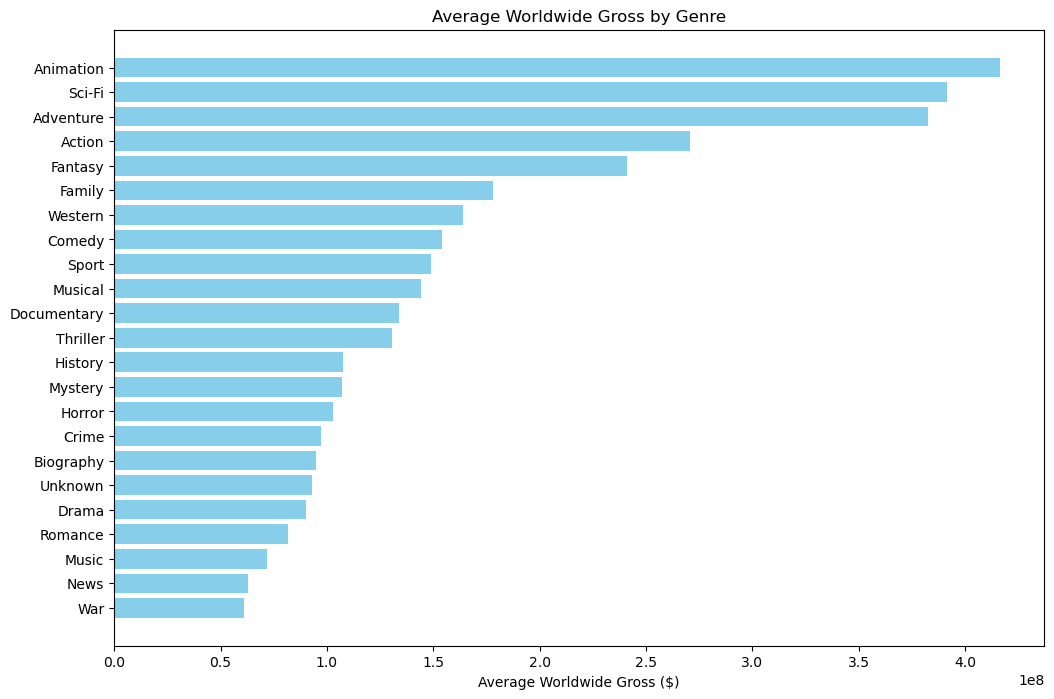

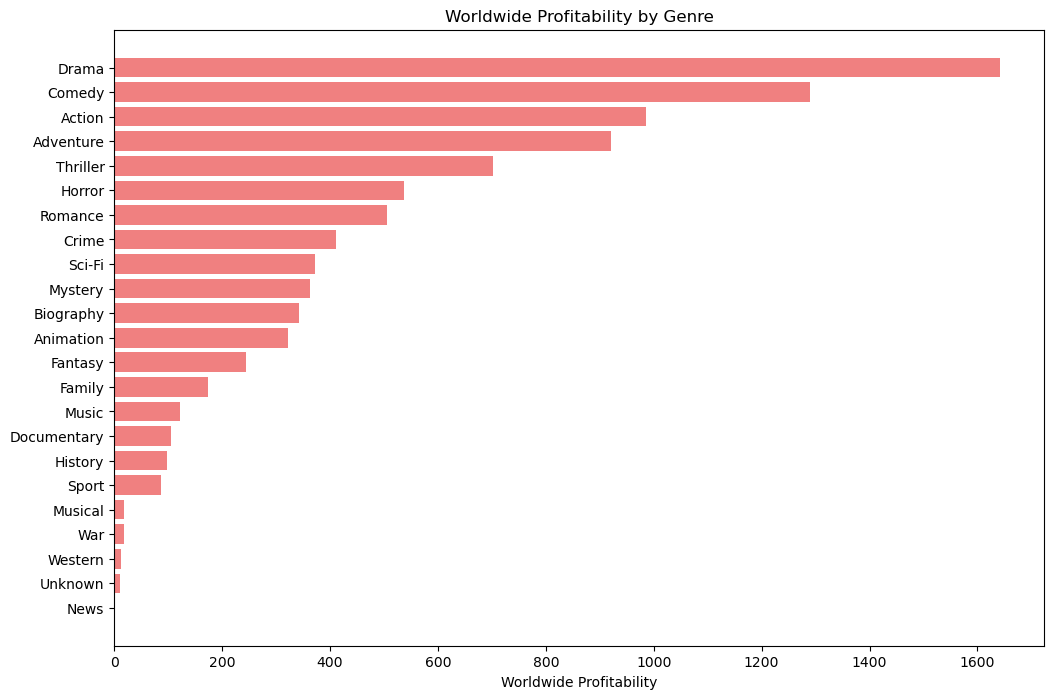

In [28]:
sorted_genre_revenue = sorted_genre_revenue.sort_values(by='avg_worldwide_gross', ascending=False)

# Plot for Average Worldwide Gross
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(sorted_genre_revenue['genre'], sorted_genre_revenue['avg_worldwide_gross'], color='skyblue')
ax.set_xlabel('Average Worldwide Gross ($)')
ax.set_title('Average Worldwide Gross by Genre')
ax.invert_yaxis()

# Plot for Worldwide Profitability
fig1, ax1 = plt.subplots(figsize=(12, 8))
sorted_genre_revenue = sorted_genre_revenue.sort_values(by='worldwide_profitability', ascending=False)
ax1.barh(sorted_genre_revenue['genre'], sorted_genre_revenue['worldwide_profitability'], color='lightcoral')
ax1.set_xlabel('Worldwide Profitability')
ax1.set_title('Worldwide Profitability by Genre')
ax1.invert_yaxis()

### Interpretation & Recommendation

Based on the analysis, Animation and Sci-Fi genres have the highest average worldwide gross, indicating significant revenue potential. However, Drama and Comedy genres show the highest profitability, suggesting they offer better returns on investment relative to their costs. To strike a balance between high revenue and strong profitability, consider investing in Action and Adventure genres. These genres consistently rank high in both gross earnings and profitability, offering a stable and lucrative investment opportunity.

## Q2: How do production budgets correlate with box office performance?

### Introduction

In this section, we will explore the relationship between production budgets and box office performance. By analyzing this correlation, we can provide insights into how budget allocations impact a movie's financial success.

### Data Preparation